In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pyuvdata import UVBeam, ShortDipoleBeam, BeamInterface
from pyuvdata.datasets import fetch_data
from pyuvdata.utils.plotting import get_az_za_grid, plot_beam_arrays

filename = fetch_data("hera_fagnoni_dipole_150")

hera_beam = UVBeam.from_file(
    filename, 
    beam_type="efield",
    frequency=[150e6],
    telescope_name="HERA",
    feed_name="Dipole",
    feed_version="1.0",
    feed_pol=["x"],
    mount_type="fixed",
    model_name="Dipole - Rigging height 4.9 m",
    model_version="1.0",
    x_orientation="east",
    reference_impedance=100,
    history=(
        "Derived from https://github.com/Nicolas-Fagnoni/Simulations."
        "\nOnly 2 files included to keep test data volume low."
    )
)


In [2]:
hera_beam.select(axis2_inds=np.nonzero(hera_beam.axis2_array <= np.pi/2))

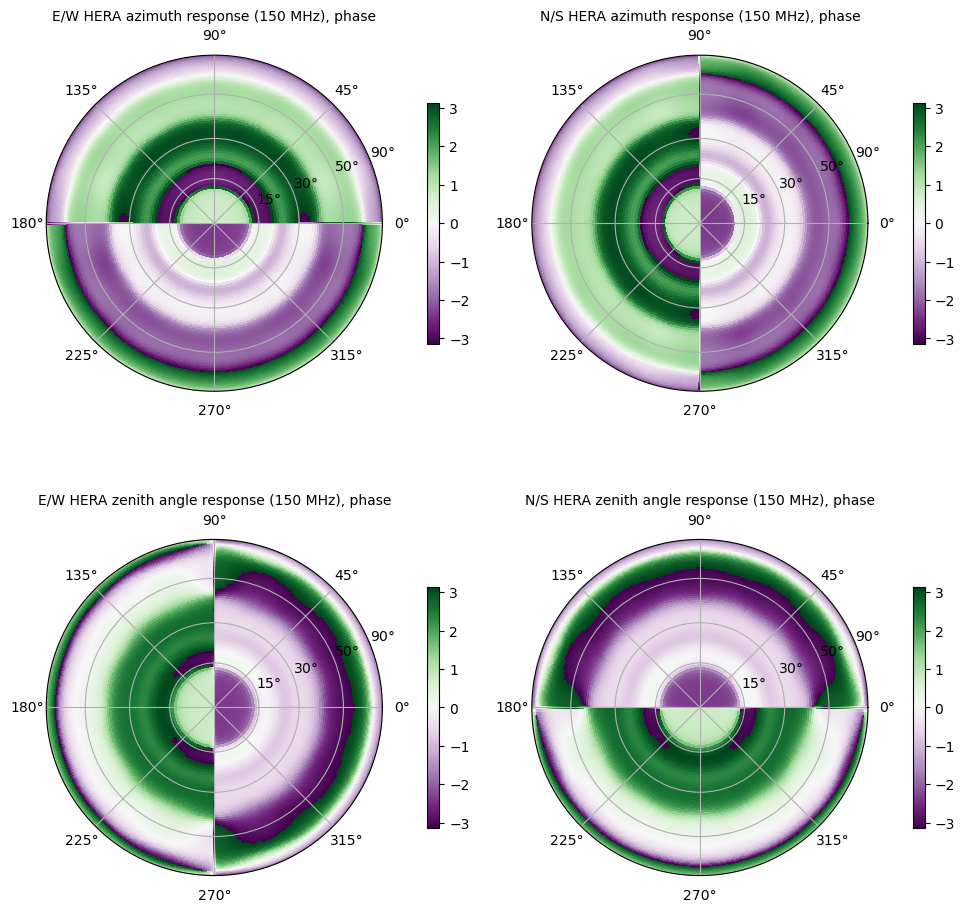

In [3]:
hera_beam.plot(freq_ind=-1, complex_type="phase")

In [4]:
zenith_ind = np.nonzero(hera_beam.axis2_array==hera_beam.axis2_array.min())
f_ind=1

flip_hera_beam = np.copy(hera_beam.data_array)
for va_i in range(hera_beam.Naxes_vec):
    for f_i in range(hera_beam.Nfeeds):
        az_angles = np.angle(np.squeeze(flip_hera_beam[va_i, f_i, :, zenith_ind]))
        az_angles[az_angles<0] += 2 * np.pi
        az_angle_diff = abs(az_angles - np.unwrap(az_angles, period=np.pi))
        az_flip = np.logical_and(az_angle_diff > 1, az_angle_diff < 4)
        # az_flip is shape (Nfreqs, Naxis1), need to reorder to get those axes adjacent
        flip_hera_beam = np.transpose(flip_hera_beam, axes=(0, 1, 2, 4, 3))
        flip_hera_beam[va_i, f_i, :, az_flip] *= -1
        # now switch back
        flip_hera_beam = np.transpose(flip_hera_beam, axes=(0, 1, 2, 4, 3))
        # check if zenith response is all negative now, if so make it positive
        print(np.min(np.squeeze(flip_hera_beam[va_i, f_i,:, zenith_ind].real), axis=-1), np.max(np.squeeze(flip_hera_beam[va_i, f_i,:, zenith_ind].real), axis=-1))
        mean_zen_val = np.mean(np.squeeze(flip_hera_beam[va_i, f_i,:, zenith_ind].real), axis=-1)
        print(mean_zen_val)
        flip_hera_beam[va_i, f_i, mean_zen_val< 0] *= -1
        print(np.mean(np.squeeze(flip_hera_beam[va_i, f_i,:, zenith_ind].real), axis=-1))


-65.07329229822683 -0.003254186181561143
-41.42759434122732
41.42759434122732
-65.07329229822683 -0.003254186181561143
-41.42759434122732
41.42759434122732
-65.07329229822683 -0.003254186181561143
-41.42759434122732
41.42759434122732
0.003254186181561143 65.07329229822683
41.42759434122732
41.42759434122732


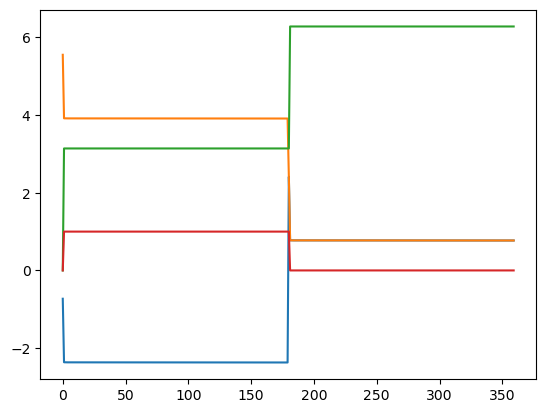

In [5]:
va_i = 1
f_i = 1

# plt.plot(np.angle(hera_beam.data_array[0, 0,:, zenith_ind].squeeze()))

az_angles = np.angle(np.squeeze(hera_beam.data_array[va_i, f_i, :, zenith_ind]))
az_angles[az_angles<0] += 2 * np.pi
az_angle_diff = abs(az_angles - np.unwrap(az_angles, period=np.pi))
az_flip = az_angle_diff > np.pi/2

plt.plot(np.angle(np.squeeze(hera_beam.data_array[va_i, f_i, :, zenith_ind])))
plt.plot(az_angles)
plt.plot(az_angle_diff)
plt.plot(np.logical_and(az_angle_diff > 1, az_angle_diff < 4))
# plt.plot(az_flip)
# plt.plot(np.angle(np.squeeze(flip_hera_beam[va_i, f_i, :, zenith_ind])))

In [6]:
print(np.max(abs(az_angles - np.unwrap(az_angles, period=np.pi)))>2*np.pi)

False


In [7]:
az_grid, za_grid = get_az_za_grid()
az_array, za_array = np.meshgrid(az_grid, za_grid)

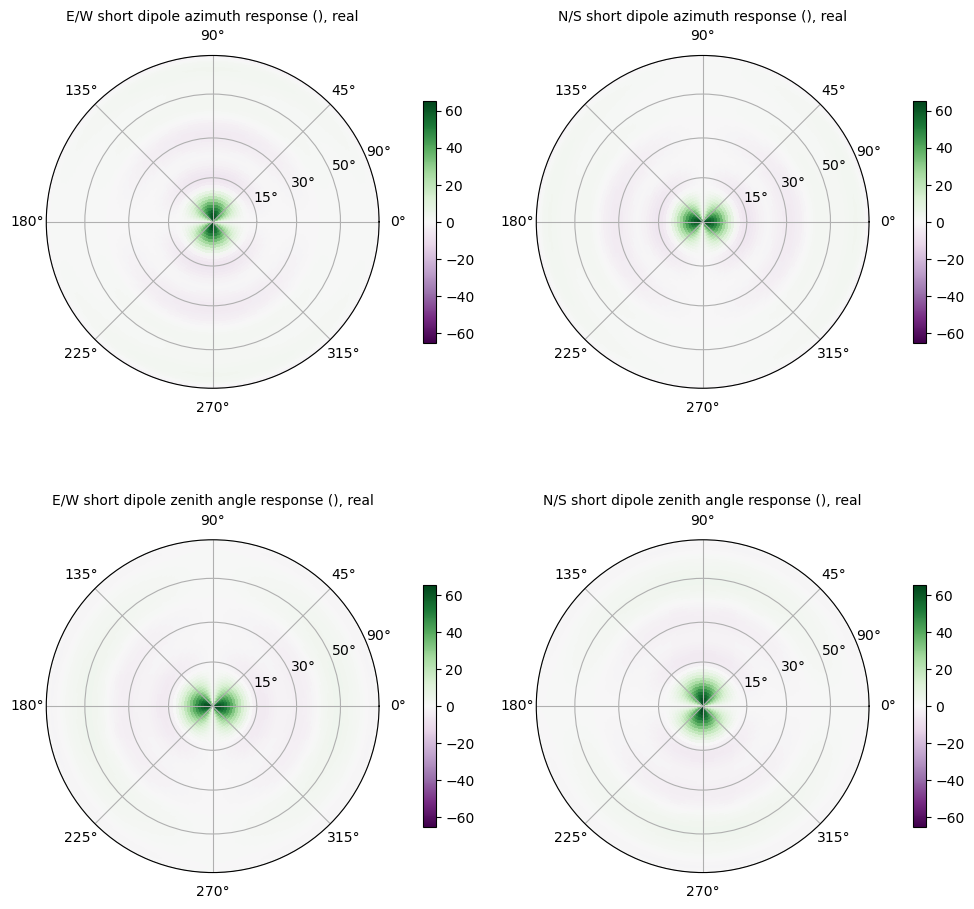

In [8]:
feed_labels = np.degrees(hera_beam.feed_angle).astype(str)
feed_labels[np.isclose(hera_beam.feed_angle, 0)] = "N/S"
feed_labels[np.isclose(hera_beam.feed_angle, np.pi / 2)] = "E/W"

plot_beam_arrays(
    flip_hera_beam[:,:,-1],
    az_array,
    za_array,
    complex_type="real",
    feedpol_label=feed_labels,
    beam_type_label="E-field",
    beam_name="short dipole",
)

In [9]:
firesp, fproj = hera_beam.decompose_feed_iresponse_projection()

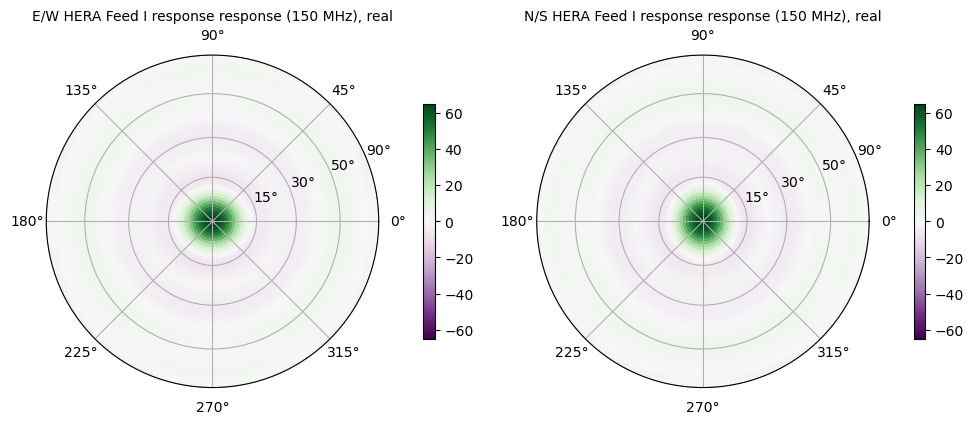

In [10]:
firesp.plot(freq_ind=-1, complex_type="real")

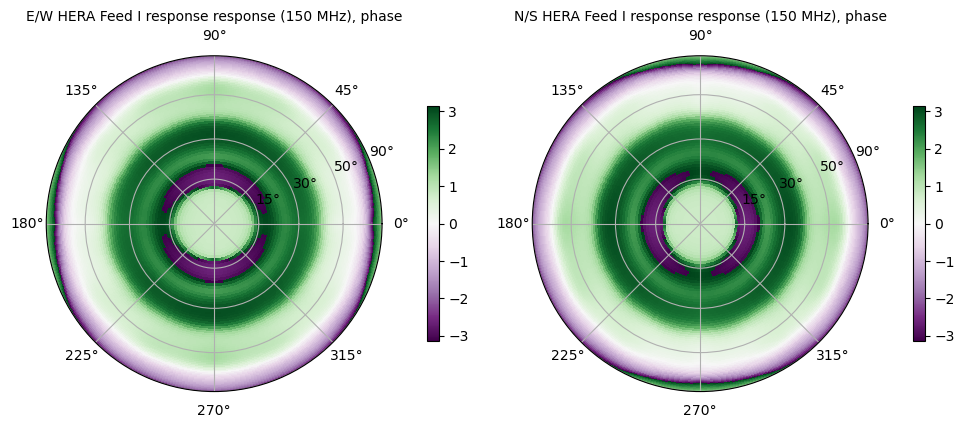

In [12]:
firesp.plot(freq_ind=-1, complex_type="phase")

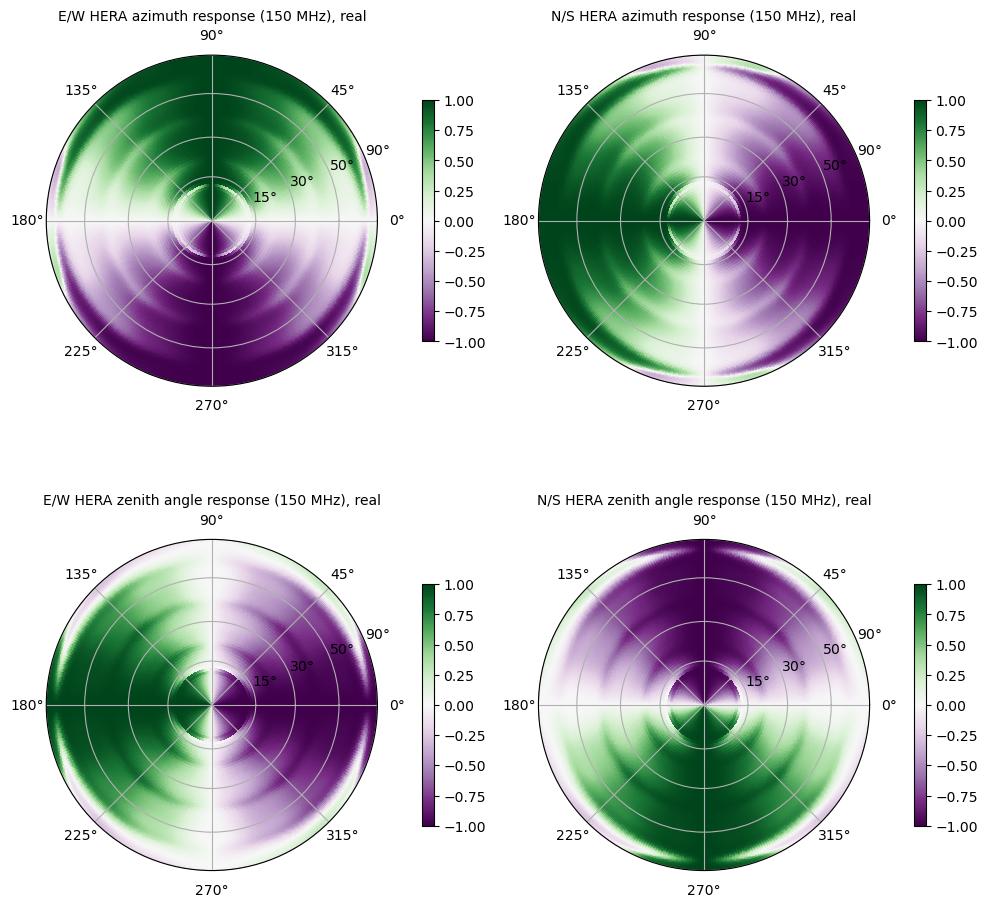

In [11]:
fproj.plot(freq_ind=-1, complex_type="real")